In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
!ls

batsmen_bowler_ipl_dataset.ipynb  ipl_dataset	   PlayerSelection_Model.ipynb
dataset_dream11.ipynb		  ipl_dataset.zip  venue_team_Dataset.ipynb


## Dataset Cleaning 

In [3]:
dataset = pd.read_csv("ipl_dataset/batsmen_ipl/R Sharma.csv")

In [4]:
dataset.head(2)

,id,order,runs,balls,strike_rate,fours,sixes,how_out,fall_of_wicket,fall_of_wicket_over,...,start_date,end_date,status,team1,team2,toss_winner,winner,referee,venue,series
0,22794,10,0,1,0.0,0,0,b Steyn,NaN,NaN,...,2013-04-05T00:00:00Z,2013-04-05T00:00:00Z,completed,58,54,54,58,NaN,58,NaN
1,22841,10,1,1,100.0,0,0,run out (Chawla),NaN,NaN,...,2013-04-07T00:00:00Z,2013-04-07T00:00:00Z,completed,54,50,54,50,NaN,71,NaN


In [5]:
# V_kholi.info()

In [6]:
columnTodrop = ["match_date","first_batting","required_run_rate","match","name","id","start_date","is_declared","match_summary_text","is_match_abandoned","is_match_drawn","scorecard","end_date","status","referee","series","fall_of_wicket_over","fall_of_wicket"]
dataset = dataset.drop(columnTodrop,axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 23 columns):
order          16 non-null int64
runs           16 non-null int64
balls          16 non-null int64
strike_rate    16 non-null float64
fours          16 non-null int64
sixes          16 non-null int64
how_out        16 non-null object
player         16 non-null int64
wicket         16 non-null int64
run            16 non-null int64
extra          16 non-null int64
bye            16 non-null int64
leg_bye        16 non-null int64
wide           16 non-null int64
no_ball        16 non-null int64
over           16 non-null float64
run_rate       16 non-null float64
team           16 non-null int64
team1          16 non-null int64
team2          16 non-null int64
toss_winner    16 non-null int64
winner         16 non-null int64
venue          16 non-null int64
dtypes: float64(3), int64(19), object(1)
memory usage: 3.0+ KB


In [7]:
dataset.head(2)

,order,runs,balls,strike_rate,fours,sixes,how_out,player,wicket,run,...,wide,no_ball,over,run_rate,team,team1,team2,toss_winner,winner,venue
0,10,0,1,0.0,0,0,b Steyn,1369,10,104,...,2,0,18.5,5.52,54,58,54,54,58,58
1,10,1,1,100.0,0,0,run out (Chawla),1369,9,99,...,1,0,20.0,4.95,54,54,50,54,50,71


### How Out

In [8]:
idTo_out = {0:"not out",1:"bold",2:"other"}

In [9]:
for i,x in enumerate(dataset["how_out"]):
    a = x.find('b')
    b = x.find('c')
    if a != -1 and b != -1:
        dataset['how_out'][i] = 2
    elif a != -1 and b == -1 or a == -1 and b != -1:
        dataset['how_out'][i] = 1
    else:
        dataset['how_out'][i] = 0

/home/puneet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/puneet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/puneet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [10]:
# V_kholi['how_out']

### OpponetTeam and Chase_column

In [11]:
idtochase = {1:'chase',0:'target'}
team_id = dataset['team'][0]
print(team_id)

54


In [12]:
chase = list()
for x in dataset['team2']:
    if x == team_id:
        chase.append(1)
    else:
        chase.append(0)
print(chase)

[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0]


In [13]:
opponent = list()
for i , x in enumerate(chase):
    if x == 1:
        opponent.append(dataset['team1'][i])
    else:
        opponent.append(dataset['team2'][i])
print(opponent)

[58, 50, 53, 58, 46, 57, 53, 50, 50, 57, 55, 51, 53, 46, 55, 53]


In [14]:
columnTodrop = ['team1','team2','player','team']
dataset = dataset.drop(columnTodrop,axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 19 columns):
order          16 non-null int64
runs           16 non-null int64
balls          16 non-null int64
strike_rate    16 non-null float64
fours          16 non-null int64
sixes          16 non-null int64
how_out        16 non-null object
wicket         16 non-null int64
run            16 non-null int64
extra          16 non-null int64
bye            16 non-null int64
leg_bye        16 non-null int64
wide           16 non-null int64
no_ball        16 non-null int64
over           16 non-null float64
run_rate       16 non-null float64
toss_winner    16 non-null int64
winner         16 non-null int64
venue          16 non-null int64
dtypes: float64(3), int64(15), object(1)
memory usage: 2.5+ KB


In [15]:
dataset['chase']= chase
dataset['opponent'] =  opponent
dataset.head(2)

,order,runs,balls,strike_rate,fours,sixes,how_out,wicket,run,extra,...,leg_bye,wide,no_ball,over,run_rate,toss_winner,winner,venue,chase,opponent
0,10,0,1,0.0,0,0,1,10,104,2,...,0,2,0,18.5,5.52,54,58,58,1,58
1,10,1,1,100.0,0,0,0,9,99,3,...,2,1,0,20.0,4.95,54,50,71,0,50


## Pearson Correlation

In [16]:
dataset=dataset.dropna(axis=0,how="any") 
dataset=dataset.reset_index(drop=True)
dataset.describe()

,order,runs,balls,strike_rate,fours,sixes,wicket,run,extra,bye,leg_bye,wide,no_ball,over,run_rate,toss_winner,winner,venue,chase,opponent
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.00000,16.000000,16.000000
mean,9.375000,2.312500,3.062500,36.805000,0.125000,0.125000,8.562500,130.687500,6.687500,0.375000,2.562500,3.125000,0.625000,19.512500,6.675625,53.25000,53.312500,65.31250,0.500000,52.812500
std,0.957427,4.392702,3.623419,52.267585,0.341565,0.341565,1.364734,20.786915,3.807339,1.024695,2.064582,2.446085,1.147461,0.838153,1.000313,2.48998,3.718759,14.56351,0.516398,3.816084
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.200000,4.950000,46.00000,46.000000,46.00000,0.000000,46.000000
25%,8.750000,0.000000,1.000000,0.000000,0.000000,0.000000,7.750000,116.500000,4.000000,0.000000,1.000000,1.750000,0.000000,19.000000,6.000000,53.00000,52.250000,53.00000,0.000000,50.000000
50%,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,9.000000,128.000000,6.000000,0.000000,2.000000,2.500000,0.000000,20.000000,6.625000,54.00000,54.000000,71.00000,0.500000,53.000000
75%,10.000000,1.250000,3.250000,87.497500,0.000000,0.000000,9.250000,142.250000,10.250000,0.000000,3.250000,4.000000,1.000000,20.000000,7.112500,54.00000,55.500000,71.00000,1.000000,55.500000
max,11.000000,13.000000,12.000000,144.440000,1.000000,1.000000,10.000000,170.000000,12.000000,4.000000,7.000000,10.000000,4.000000,20.000000,8.500000,57.00000,58.000000,92.00000,1.000000,58.000000


In [17]:
cor_matrix=dataset.corr() #function of pandas lib
cor_matrix

,order,runs,balls,strike_rate,fours,sixes,wicket,run,extra,bye,leg_bye,wide,no_ball,over,run_rate,toss_winner,winner,venue,chase,opponent
order,1.000000,-0.219940,-0.160942,-0.331199,0.050965,-0.356753,0.593127,-0.164557,-0.569234,-0.152894,-0.383639,-0.334479,-0.348926,0.159923,-0.220226,0.097876,0.301929,-0.248025,-0.134840,0.458449
runs,-0.219940,1.000000,0.936915,0.801505,0.816453,0.816453,-0.098000,0.054439,0.408831,-0.087014,0.104292,0.393209,0.408363,-0.640320,0.233676,-0.123426,-0.071675,-0.181912,0.220421,-0.115582
balls,-0.160942,0.936915,1.000000,0.667579,0.801261,0.639662,-0.169363,0.151631,0.339783,0.029178,-0.013924,0.412756,0.246529,-0.467844,0.288484,-0.142241,-0.016389,-0.206321,0.231590,-0.066595
strike_rate,-0.331199,0.801505,0.667579,1.000000,0.575671,0.679409,0.033099,-0.242671,0.346400,-0.025928,0.124841,0.231024,0.455423,-0.508303,-0.108148,-0.089643,-0.419445,-0.031677,0.205823,-0.421746
fours,0.050965,0.816453,0.801261,0.575671,1.000000,0.428571,0.125140,-0.012911,0.185833,-0.142857,0.177257,-0.019948,0.467768,-0.424986,0.107072,0.039193,-0.032803,-0.517652,0.377964,0.019180
sixes,-0.356753,0.816453,0.639662,0.679409,0.428571,1.000000,-0.160894,0.071595,0.493417,-0.142857,0.177257,0.458809,0.467768,-0.774290,0.284630,-0.117579,0.019682,0.098840,0.000000,-0.083113
wicket,0.593127,-0.098000,-0.169363,0.033099,0.125140,-0.160894,1.000000,-0.698395,-0.400147,0.220484,-0.238086,-0.561670,0.101108,-0.303797,-0.656851,-0.024523,-0.010673,-0.445485,0.331089,0.213616
run,-0.164557,0.054439,0.151631,-0.242671,-0.012911,0.071595,-0.698395,1.000000,0.396277,-0.175663,0.297964,0.461028,-0.047166,0.319365,0.969531,0.188373,0.233340,0.231353,-0.326057,0.058883
extra,-0.569234,0.408831,0.339783,0.346400,0.185833,0.493417,-0.400147,0.396277,1.000000,0.288361,0.719308,0.620096,0.444442,-0.270280,0.499022,-0.244369,-0.331660,0.142550,0.050862,-0.486092
bye,-0.152894,-0.087014,0.029178,-0.025928,-0.142857,-0.142857,0.220484,-0.175663,0.288361,1.000000,-0.011817,0.113040,-0.155923,-0.083445,-0.159591,-0.248223,-0.172764,-0.204939,0.377964,-0.117211


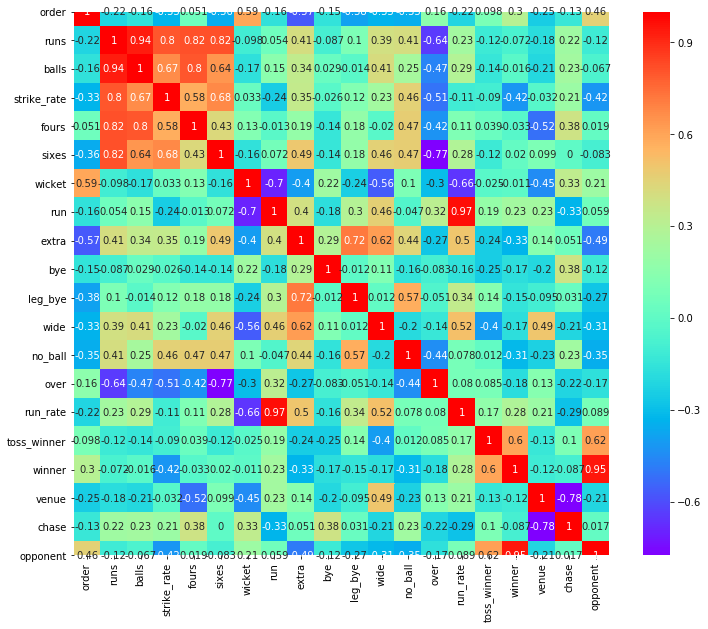

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(cor_matrix,annot=True,cmap="rainbow")
plt.show()

## Feature Selection

## 1. Filter Method

In [19]:
#Correlation with output variable
cor_target = abs(cor_matrix["runs"])
print(len(cor_target))
print(cor_target)
print()
#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.25]
print(relevant_features)

20
order          0.219940
runs           1.000000
balls          0.936915
strike_rate    0.801505
fours          0.816453
sixes          0.816453
wicket         0.098000
run            0.054439
extra          0.408831
bye            0.087014
leg_bye        0.104292
wide           0.393209
no_ball        0.408363
over           0.640320
run_rate       0.233676
toss_winner    0.123426
winner         0.071675
venue          0.181912
chase          0.220421
opponent       0.115582
Name: runs, dtype: float64

runs           1.000000
balls          0.936915
strike_rate    0.801505
fours          0.816453
sixes          0.816453
extra          0.408831
wide           0.393209
no_ball        0.408363
over           0.640320
Name: runs, dtype: float64


### 2 Wrapper Method(RFE)

In [20]:
## Dataset split
Y=pd.DataFrame(dataset["runs"],columns=["runs"])
X=dataset[[each for each in dataset.columns if each!="runs"]]
# X.info()

In [21]:
X.head(3)

,order,balls,strike_rate,fours,sixes,how_out,wicket,run,extra,bye,leg_bye,wide,no_ball,over,run_rate,toss_winner,winner,venue,chase,opponent
0,10,1,0.00,0,0,1,10,104,2,0,0,2,0,18.5,5.52,54,58,58,1,58
1,10,1,100.00,0,0,0,9,99,3,0,2,1,0,20.0,4.95,54,50,71,0,50
2,10,12,83.33,1,0,0,8,142,5,0,1,4,0,20.0,7.10,53,53,46,1,53


In [22]:
Y.head(3)

,runs
0,0
1,1
2,10


In [23]:
# X = X.values
# Y = Y.values

In [24]:
# Recursive Feature Elimination
model = LinearRegression()
rfe = RFE(model, 7)
X_rfe = rfe.fit_transform(X,Y)  
model.fit(X_rfe,Y)
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True  True  True False False  True False False
 False False False False  True False  True False]
[ 6  1 14 11  1  1  1 12  8  1  3  7  5 10  4 13  1  9  1  2]


/home/puneet/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
#no of features
nof_list=np.arange(1,20)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(score_list)

/home/puneet/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/puneet/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/puneet/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/puneet/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Optimum number of features: 0
Score with 0 features: 0.000000
[-63.62545454545454, -49.094908658523416, -61.773988849435526, -233.1463401791587, -908.9565567081129, -3049.2363213496396, -960.5121136027803, -983.2779225816249, -1119.1454240175976, -4497.1397523561145, -2773.5763065771735, -58.79513378098631, -58.870655488236906, -4.665004475030844, -4.631675580066134, -4.5451147938437435, -4.744439578430912, -4.677330991087081, -4.671571707145801]


/home/puneet/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/puneet/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/puneet/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
cols = list(X.columns)
model = LinearRegression()
rfe = RFE(model, 10)             
X_rfe = rfe.fit_transform(X,Y)  
model.fit(X_rfe,Y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['balls', 'sixes', 'how_out', 'wicket', 'bye', 'leg_bye', 'run_rate',
       'winner', 'chase', 'opponent'],
      dtype='object')


/home/puneet/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 3 Embedded Method(Regularisation method)

In [37]:
reg = LassoCV()
reg.fit(X, Y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,Y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 1.608936
Best score using built-in LassoCV: 0.916388


/home/puneet/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/puneet/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [38]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 15 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

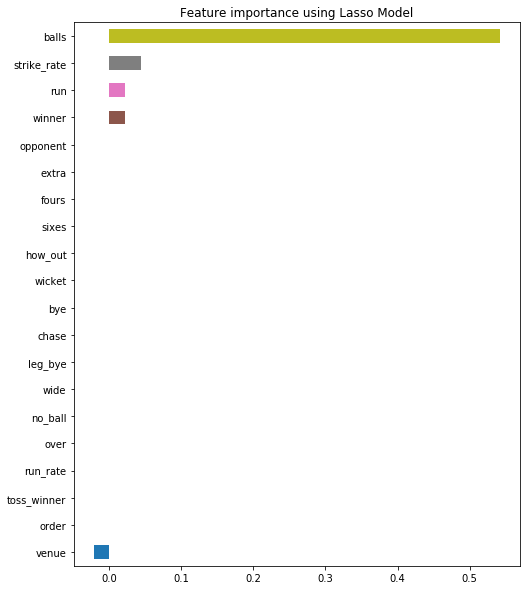

In [39]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Model

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.1,random_state = 0)

In [41]:
Sk_LR=LinearRegression()
Sk_LR.fit(X_train,y_train)
pred_sk=Sk_LR.predict(X_test)

In [42]:
print(pred_sk)

[[ 0.34514326]
 [-2.66681649]]


In [33]:
Sk_LR.score(X_test,y_test)

-14.081495034341197